# Bibliotheken importieren

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

# Daten einlesen und überblick über die Daten

In [2]:
df=pd.read_csv('C:/Users/kuimi/Documents/Master_Freiberg/Formation_Professionnelle/Data Sciences/Code_Souces/Projets_Portfolio/A_B Testing/ab_data.csv')
df.shape

(294478, 5)

In [3]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [4]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


# Prüfung auf fehlende Werte

In [6]:
print("Fehlende Werte pro Spalte:")
df.isnull().sum().sort_values(ascending=False)

Fehlende Werte pro Spalte:


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# Konversionsrate nach Gruppen
df['converted'].value_counts(normalize=True)

converted
0    0.880341
1    0.119659
Name: proportion, dtype: float64

In [9]:
# Überprüfung auf Inkonsistenzen zwischen group und landing_page
df.query("(group == 'treatment' and landing_page != 'new_page') or (group == 'control' and landing_page != 'old_page')").shape

(3893, 5)

In [10]:
#  Löschen von Zeilen, die nicht den richtigen Gruppen/Seiten-Kombinationen entsprechen
df = df.query("(group == 'treatment' and landing_page == 'new_page') or (group == 'control' and landing_page == 'old_page')")

# Berechnung der Umwandlungssätze 

In [11]:
# durchschnittliche Umwandlung pro Gruppe
converted_rates = df.groupby('group')['converted'].mean()
print(converted_rates)

group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64


In [12]:
# Größe der einzelnen Gruppen 
df['group'].value_counts()

group
treatment    145311
control      145274
Name: count, dtype: int64

# Statistischer Test (Z-Test für Proportionen) 

In [13]:
from statsmodels.stats.proportion import proportions_ztest
#anzahl der Konversion
Konversion = df.groupby('group')['converted'].sum().values

# Größe der einzelnen Gruppen 
n_obs = df['group'].value_counts().values

In [14]:
# Z-test
z_score, p_value = proportions_ztest(Konversion, n_obs)
print(f"Z-score: {z_score:.3f}")
print(f"P-value: {p_value:.4f}")

Z-score: 1.261
P-value: 0.2073


Nach einem Z-Test liegt der p-Wert bei 0.2073, was größer als 0.05 ist. Wir können also nicht schlussfolgern, dass die neue Version besser ist. 

# Visualisierung der Ergebnisse

C:\Users\kuimi\AppData\Local\Temp\ipykernel_15008\2564772816.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='group', y='converted', ci=False)


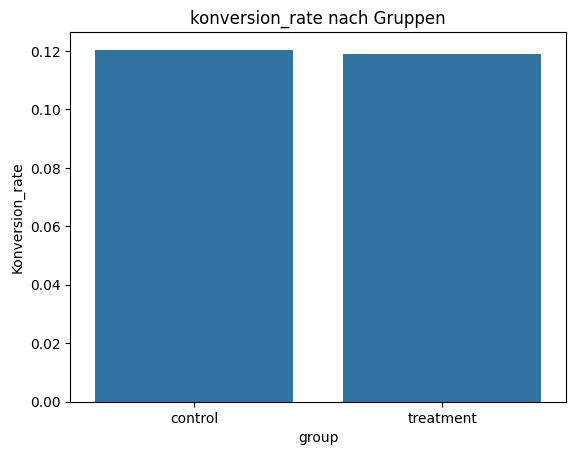

In [15]:
sns.barplot(data=df, x='group', y='converted', ci=False)
plt.title("konversion_rate nach Gruppen")
plt.ylabel("Konversion_rate")
plt.show()